# Unidad 2
## Definición de funciones

In [15]:
dbinom <- function(a, b) {
    p <- seq(a-b+1, b)
    size <- length((p))
    prod <- 1
    for (i in 1:size) {
        prod <- prod * p[i]
    }
    prod/factorial(b)
}

## Uso de Bibliotecas

In [16]:
library(VeryLargeIntegers)

## Situación 1:
Sea p la proporción de estudiantes de una universidad que aprueban las políticas gubernamentales
sobre becas estudiantiles. El periódico estudiantil toma una muestra aleatoria de n = 30 estudiantes
de la universidad y registra si los estudiantes aprueban las políticas gubernamentales sobre
asignación de becas.

(a) ¿Cuál es la distribución de y, el número de respuestas “si”?

(b) Suponga que, de los 30 estudiantes, 8 contestaron que sí. ¿Cuál es el estimador frecuentista de p?

(c) Encuentre la distribución final de p, f(p|y), si se usa una inicial uniforme.

(d) Cuál sería el estimador Bayesiano de p?

### Solución

(a) Distribución de número de respuesta si.

Si bien no se conoce la probabilidad de una respuesta afirmativa, la distribución del número de respuestas sí se puede modelar como:
$$P(X = x) = Binomial(X=x, n=30, p)$$

(b) Suponga que, de los 30 estudiantes, 8 contestaron que sí. ¿Cuál es el estimador frecuentista de p?

$$p=\frac{8}{30}=\frac{4}{15}=0.267$$

(c) Encuentre la distribución final de p, f(p|y), si se usa una inicial uniforme.

$$p(\theta) = Beta(\theta, \alpha=1, \beta=1) \propto \theta^{\alpha-1} (1-\theta)^{\beta-1}$$

Verosimilitud
$$p(y|\theta)=Binomial(y = 8, n=30, p=\theta) \propto \theta^8 (1-\theta)^{30-8}$$

Distribución final
$$p(\theta|y)=p(y|\theta)p(\theta)$$

$$p(\theta|y)\propto \theta^{1-1} (1-\theta)^{1-1} \theta^8 (1-\theta)^{30-8}$$

$$p(\theta|y)\propto \theta^{8+1-1} (1-\theta)^{30+1-8-1} =\theta^{9-1} (1-\theta)^{23-1}$$

$$p(\theta|y)\propto Beta(\theta, \alpha=9, \beta=23)$$

(d) Cuál sería el estimador Bayesiano de p?

Si se minimiza el error 0-1:
$$Modo = \frac{\alpha-1}{\alpha+\beta-2}=\frac{8}{30}=0.267$$

Si se minimiza el error cuadrático:
$$Media = \frac{\alpha}{\alpha+\beta}=\frac{9}{32}=0.281$$

Si se minimiza el error absoluto, el estimador es la mediana. Cálculo numérico de la mediana
$$P(p <= p_{med}|D)= 0.5$$
p = 0.277

In [7]:
qbeta(0.5, 9, 23)

[1] 0.2766453

## Situación 2:

En el estudio de la calidad del agua en los arroyos de Nueva Zelanda documentados en McBride et
al. (2002) un alto nivel de Campylobacter se define como un nivel mayor que 100 por cada 100 ml
de agua corriente; n = 116 muestras fueron tomadas de arroyos que tiene un alto impacto ambiental
para las aves. De estas 11 resultaron tener alto nivel de Campylobacter. Sea p la verdadera
probabilidad de que una muestra de agua de este tipo de arroyos tenga un alto nivel de
Campylobacter.

(a) Obtenga el estimador frecuentista de p.

(b) Utilice un Beta (1, 10) como inicial y obtenga la distribución posterior de p.

(c) Encuentre la media y la varianza posterior. ¿Cuál es el estimador Bayesiano para p?

(d) Encuentre un intervalo de credibilidad del 95% para p.

(e) Contraste las hipótesis H0: p = 0,10 vs. H1: p≠ 0,10 con un nivel de significancia del
5%.

### Solución

(a) Obtenga el estimador frecuentista de p.

$$p = \frac{11}{116}=0.0948$$

(b) Utilice un Beta (1, 10) como inicial y obtenga la distribución posterior de p.

Distribución a priori
$$p(\theta)=Beta(\theta, \alpha=1, \beta=10)$$

Verosimilitud

$$p(y|\theta)=Binomial(y=11, n=116, p=\theta)$$

Distribución posterior
$$p(\theta|y)\propto Beta(\theta, \alpha=12, \beta=115)$$

(c) Encuentre la media y la varianza posterior. ¿Cuál es el estimador Bayesiano para p?

Media
$$E[\theta|y]=\frac{\alpha}{\alpha+\beta}=\frac{12}{12+115}=0.0945$$

Varianza
$$V[\theta|y]=\frac{\alpha\beta}{(\alpha+\beta)^2(\alpha+\beta+1)}=\frac{12.115}{(12+115)^2(12+115+1)}=0.0006684$$
Mediana

Se calcula numéricamente
$$P(p <= p_{med}|D)= 0.5$$
$$p=0.0924$$ 

In [8]:
qbeta(0.5, 12, 115)

[1] 0.09236085

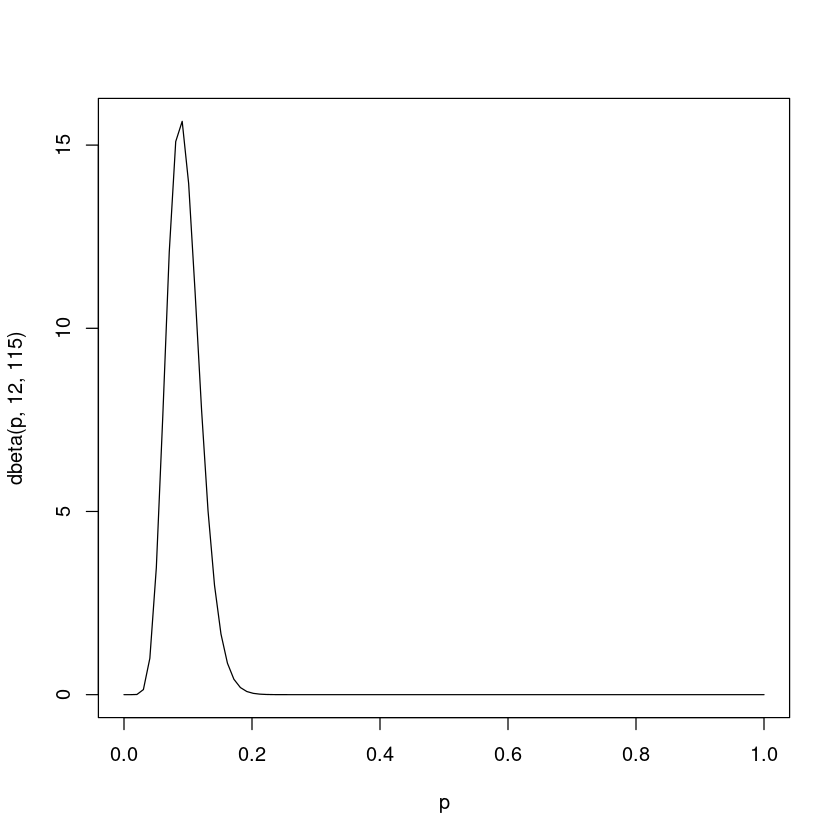

In [9]:
p = seq(0, 1, length=100)
plot(p, dbeta(p, 12, 115), type='l')

(d) Encuentre un intervalo de credibilidad del 95% para p.

In [10]:
cat(round(qbeta(.025, 12, 115), 4), round(qbeta(0.975, 12, 115), 4))

0.0502 0.1508

(e) Contraste las hipótesis H0: p = 0,10 vs. H1: p≠ 0,10 con un nivel de significancia del
5%.

El intérvalo de credibilidad del 95% contine a $p=0.10$ por lo que no hay suficiente evidencia en contra de $H_0$.

La probabilidad bajo $H_0$ es:
$$\binom{116}{11}0.10^{11}(1-0.10)^{105}$$

In [12]:
dbinom(11, 116, 0.10)

[1] 0.1232879

La probabilidad bajo $H_1$ es:

$$P(p|H_1)=\int\binom{116}{11}\theta^{11}(1-\theta)^{116-11}\frac{\theta^{1-1}(1-\theta)^{10-1}}{Beta(1,10)}d\theta$$

$$P(p|H_1)=\binom{116}{11}\frac{1}{{Beta(1,10)}}\int\theta^{12-1}(1-\theta)^{115-1}d\theta$$
$$\int\theta^{12-1}(1-\theta)^{115-1}d\theta=Beta(12,115)$$
$$Beta(1,10)=\frac{\Gamma(1)\Gamma(10)}{\Gamma(10+1)}=\frac{0!9!}{10!}=\frac{1}{10}$$

$$P(p|H_1)=\binom{116}{11}\frac{Beta(12,115)}{Beta(1,10)}=0.0336$$

Cálculo del factor de Bayes

$$FBayes = \frac{P(X=11|H_0)}{P(X=11|H_1)}=\frac{Beta(1,10)0.10^{11}(1-0.10)^{105}}{Beta(12,115)}=3.664$$

In [15]:
binom(116,11)*beta(12,115)/beta(1,10)
beta(1,10)*(0.10**11)*(0.90**105)/beta(12,115)


[1] 0.03364405

[1] 3.664479

Como el $BF_{01}>3$ es evidencia moderada a favor de la hipótesis nula $H_0$

## Situación 3:

En el mismo estudio de la calidad del agua n = 145 muestras fueron tomadas de arroyos que tiene un alto impacto
ambiental para la producción láctea. De estas y = 9 resultaron tener alto nivel de Campylobacter. Sea p la verdadera
probabilidad de que una muestra de agua de este tipo de arroyos tenga un alto nivel de Campylobacter.

(a) Obtenga el estimador frecuentista de p.

(b) Utilice un Beta (1, 10) como inicial y obtenga la distribución posterior de p.

(c) Encuentre la media y la varianza posterior. ¿Cuál es el estimador Bayesiano para p?

(d) Encuentre un intervalo de credibilidad del 95% para p.

### Solución

(a) Obtenga el estimador frecuentista de p.
$$p=\frac{9}{145}=0.06207$$

(b) Utilice un Beta (1, 10) como inicial y obtenga la distribución posterior de p.

La verosimilitud está dada por 
$$Binomial(X = 9, n=145, p=\theta)$$

La distribución posterior resulta:

$$P(\theta|y) \propto Beta(\alpha=10, \beta=146)$$

(c) Encuentre la media y la varianza posterior. ¿Cuál es el estimador Bayesiano para p?

Media
$$E[\theta|y]=\frac{\alpha}{\alpha+\beta}=\frac{10}{10+146}=0.06410$$

Varianza
$$V[\theta|y]=\frac{\alpha\beta}{(\alpha+\beta)^2(\alpha+\beta+1)}=\frac{10.146}{(10+146)^2(10+146+1)}=0.000382$$

(d) Encuentre un intervalo de credibilidad del 95% para p.

In [29]:
qbeta(0.025, 10, 146)
qbeta(0.975, 10, 146)

[1] 0.03136885

[1] 0.1073611

(e) Contraste las hipótesis H0: p = 0.09 vs. H1 : p ≠ 0.09 con un nivel de significancia del 5%.

El intérvalo del 95% de confianza contiene a 0.09, por lo que no hay evidencia suficiente en contra de $H_0$.

Si se calcula el factor de Bayes:

$$BF_{10}=\frac{\int \binom{145}{9} \theta^9(1-\theta)^{136}\frac{\theta^{1-1}(1-\theta)^{10-1}}{Beta(1,10)}d\theta}{\binom{145}{9} 0.06207^9(1-0.06207)^{136}}=\frac{Beta(10,146)}{Beta(1,10)0.06207^9(1-0.06207)^{136}}=0.272$$

$BF_{10}=0.272$ es evidencia en contra de $H_1$ por lo que no se rechaza la hipótesis nula.


In [30]:
beta(10,146)/((0.06207**9)*((1-0.06207)**136)*beta(1,10))


[1] 0.2716911

## Situación 4:
Retomando el problema 2 del parcial: Un estadístico compra un paquete de 10 pelotas nuevas de
golf, deja caer cada pelota a una altura de un metro, y registra las medidas de la altura del primer
rebote en centímetros. Los diez valores son:
79,9 80 78,9 78,5 75,6 80,5 82,5 80,1 81,6 76,7
Se asume que la altura de rebote (en cm) es $Normal (μ, 2^2)$.

(a) Suponga una inicial $Normal (75, 10^2)$ y encuentre la distribución posterior de μ.

(b) Calcular un intervalo de credibilidad Bayesiano del 95% para μ.

(c) Realice el contraste de hipótesis bayesiano H0 : μ ≥ 80 vs. H1 : μ < 80 con un nivel de significancia del 5%.

### Solución

(a) Suponga una inicial $Normal (75, 10^2)$ y encuentre la distribución posterior de μ.

$$P(\mu|y)=P(y|\mu)P(\mu)=Normal (μ, 2^2)Normal(75, 10^2)$$
$$P(\mu|y)=Normal(\frac{\frac{\mu_0}{\sigma_0^2}+\frac{n\overline{y}}{\sigma_y^2}}{\frac{1}{\sigma_0^2}+{\frac{n}{\sigma_y^2}}})$$


In [16]:
sample <- c(79.9, 80, 78.9, 78.5, 75.6, 80.5, 82.5, 80.1, 81.6, 76.7)
ny <- sum(sample)
n <- length(sample)

v <- 1/(1/100+n/4)
m <- (75/100+ny/4)*v
round(m, 3)
round(v, 3)

[1] 79.412

[1] 0.398

La distribución posterior está dada por

$$Normal(79.412, 0.398)$$

(b) Calcular un intervalo de credibilidad Bayesiano del 95% para μ.

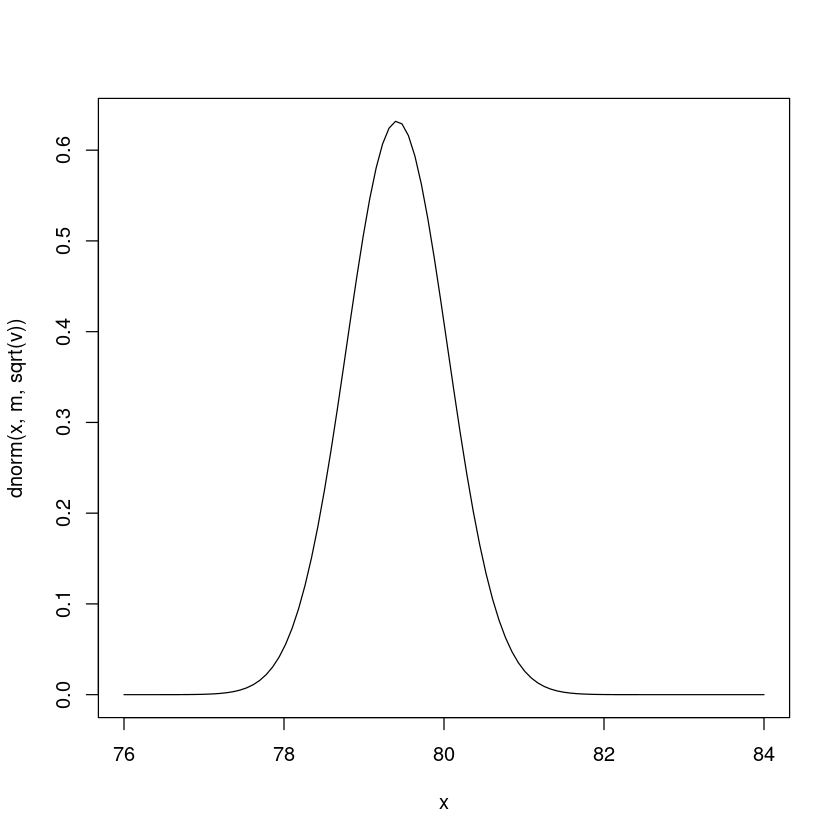

In [4]:
x <- seq(76, 84, length=100)
plot(x, dnorm(x, m, sqrt(v)), type="l")

In [17]:
round(qnorm(.025, m, sqrt(v)), 3)
round(qnorm(.975, m, sqrt(v)), 3)

[1] 78.175

[1] 80.649

(c) Realice el contraste de hipótesis bayesiano H0 : μ ≥ 80 vs. H1 : μ < 80 con un nivel de significancia del 5%.

In [25]:
paste("P(H0)=", 1-pnorm(80,m, sqrt(v)))
paste("P(H1)=", pnorm(80,m, sqrt(v)))

pnorm(80,m, sqrt(v))/(1-pnorm(80,m, sqrt(v)))

[1] "P(H0)= 0.175923744487698"

[1] "P(H1)= 0.824076255512302"

[1] 4.684281

$$BF_{10}=\frac{P(\mu<80|x)}{P(\mu>=80|x)}=4.684$$

El factor de bayes indica una evidencia moderada a favor de $H_1$.

## Situación 5:

Un modelo Normal tiene varianza igual a 25. Suponga que la distribución inicial para μ es Normal
(100,4).

(a) Encuentre la probabilidad inicial de que μ < 102.

(b) Encuentra un intervalo inicial de máxima densidad al 95% para μ.

Una muestra de 50 observaciones del modelo Normal dio como resultado:

105, 102, 102,101, 121, 108, 108, 105, 102, 111, 104, 112, 112, 101, 98, 105, 100, 102,
101, 96, 110, 110,108, 100, 105, 96, 95, 108, 97, 103, 104, 103, 98, 100, 102, 103, 109,
101, 106, 105, 108,108, 104, 106, 109, 107, 100, 101, 106, 103

(c) Encuentra la probabilidad posterior de que μ < 102.

(d) Encuentra un intervalo posterior de máxima densidad al 95% para μ.

### Solución

(a) Encuentre la probabilidad inicial de que μ < 102.

In [3]:
pnorm(102, 100, 4)

[1] 0.6914625

(b) Encuentra un intervalo inicial de máxima densidad al 95% para μ.

In [5]:
cat(round(qnorm(.025, 100, 4), 4), " ", round(qnorm(.975, 100, 4), 4))

92.1601   107.8399

(c) Encuentra la probabilidad posterior de que μ < 102.

In [15]:
sample <- c(105, 102, 102,101, 121, 108, 108, 105, 102, 111, 104, 112, 112, 101, 98, 105, 100, 102,
101, 96, 110, 110,108, 100, 105, 96, 95, 108, 97, 103, 104, 103, 98, 100, 102, 103, 109,
101, 106, 105, 108,108, 104, 106, 109, 107, 100, 101, 106, 103)

n <- length(sample)
nx <- sum(sample)

v0 <- 4
v <- 25
m0 <- 100

vp <- 1/(1/v0 + n/v)
mp <- (nx/v+m0/v0)*vp

cat("Media: ", mp, "Varianza ", vp)

Media:  103.7511 Varianza  0.4444444

(d) Encuentra un intervalo posterior de máxima densidad al 95% para μ.

In [16]:
cat(round(qnorm(.025, mp, vp), 4), " ", round(qnorm(.975, mp, vp), 4))

102.88   104.6222

## ACTIVIDAD 2: 
Piensa, escribe y resuelve una situación donde apliques prueba de hipótesis
bayesiana. Comparte esta actividad resuelta en el foro de esta unidad para socializarla con
tus compañeros.

### Solución

Usando los microdatos de la Encuesta Permanente de Hogares del 4to cuatrimestre de 2024, se quiere estimar la distribución de personas  mayores de 25 años cuyo nivel educativo máximo alcanzado es el universitario.

In [2]:
data <- read.csv("usu_individual_T424.txt", sep = ";")
nrow(data[data$CH06>=25,])

[1] 30378

In [3]:
nrow(data[data$CH12==7,])

[1] 7393

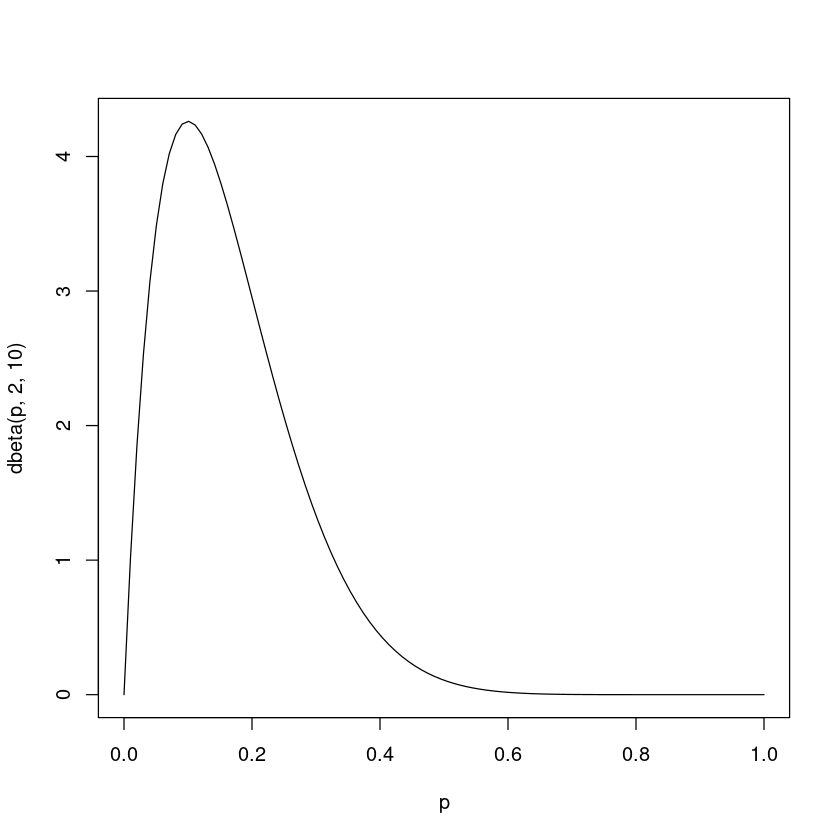

In [4]:
p = seq(0, 1, length=100)
plot(p, dbeta(p, 2, 10), type='l')

A priori

$$P(\theta <= p) =Beta(\theta, 2, 10)$$

Verosimilitud

$$P(y|\theta)=Binomial(X = 7393, n=30378, p=\theta)$$

A posteriori

$$P(\theta|y)\propto Beta(\theta, 7395, 22995)$$


In [6]:
beta(7395, 22995)

[1] 0

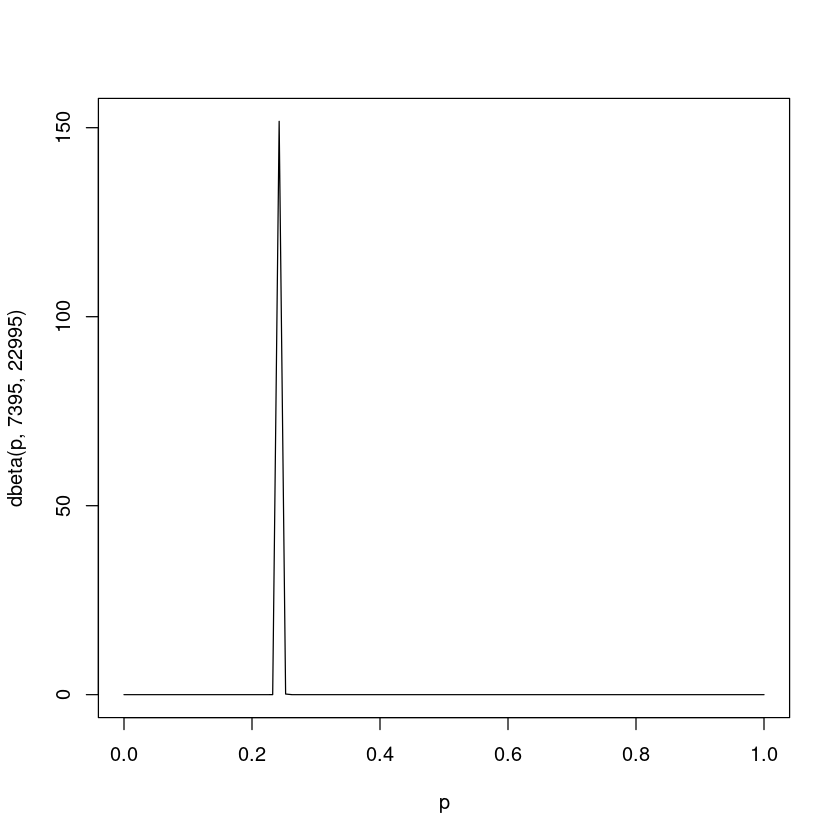

In [7]:
p = seq(0, 1, length=100)
plot(p, dbeta(p, 7395, 22995), type='l')

In [9]:
qbeta(0.025, 7395, 22995)
qbeta(0.975, 7395, 22995)

[1] 0.2385284

[1] 0.2481768

In [18]:
binom(30378,7393)

[1] NaN